In [ ]:
R.version.string

[1] "R version 4.2.1 (2022-06-23)"

In [ ]:
install.packages('reshape2')
install.packages('pwr')
install.packages('gdata')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gtools’




In [ ]:
if(!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("ssize")
BiocManager::install("marray")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.19), R 4.2.1 (2022-06-23)

Installing package(s) 'BiocVersion', 'ssize'

also installing the dependency ‘xtable’


Old packages: 'data.table', 'devtools', 'digest', 'jsonlite', 'openssl',
  'processx', 'ps', 'roxygen2', 'sys', 'tibble', 'tidyverse', 'vctrs', 'xfun',
  'yaml', 'zip', 'foreign', 'mgcv', 'rpart'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.19), R 4.2.1 (2022-06-23)

Installing package(s) 'marray'

also installing the dependency ‘limma’


Old packages: 'data.table', 'devtools', 'digest', 'jsonlite', 'openssl',
  'processx', 'ps', 

In [ ]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(reshape2)
library(pwr)
library(ssize)
library(gdata)
library(marray)

1) Download the GEO Brain Aging study from the class website.  Also obtain the annotation file for this data frame.

2) Load into R, using read.table() function and the header=T/row.names=1 arguments for each data file.

In [ ]:
dat = read.table('agingStudy11FCortexAffy.txt', header=T, row.names=1)
head(dat)

,GSM27015.26.M,GSM27016.26.M,GSM27018.29.M,GSM27021.37.M,GSM27023.40.M,GSM27024.42.M,GSM27025.45.M,GSM27027.52.M,GSM27028.53.M,GSM27031.66.M,⋯,GSM27020.36.F,GSM27022.38.F,GSM27026.48.F,GSM27029.56.F,GSM27030.61.F,GSM27033.71.F,GSM27037.81.F,GSM27039.87.F,GSM27041.90.F,GSM27044.106.F
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31307_at,179.8630,106.4950,265.5860,301.2430,218.5090,224.6100,256.0590,137.9230,139.180,50.7749,⋯,196.1630,183.3520,127.5160,154.1870,188.3010,152.1210,139.1030,199.679,114.8440,217.9670
31308_at,559.0780,411.4830,481.1760,570.7330,333.5390,370.0790,558.0270,310.9570,404.723,426.2720,⋯,446.2050,391.7210,238.4240,511.7930,300.5500,468.0530,463.4340,525.637,373.7830,385.1110
31309_r_at,20.7697,30.6415,50.2153,42.6892,27.1059,21.5762,10.6286,47.6724,11.073,39.8862,⋯,33.8327,32.3855,23.8202,18.0976,27.0145,13.8967,14.9957,19.525,43.4167,55.4229
31310_at,154.1910,224.4460,188.8230,177.8630,233.4630,120.9080,217.8070,66.0645,205.010,126.1900,⋯,164.8950,152.4320,183.8300,233.1270,98.7380,230.4060,68.8964,245.693,447.8360,246.6050
31311_at,956.7970,648.3100,933.6560,1016.4100,762.0130,1040.2900,1058.2000,695.9470,1185.670,658.6110,⋯,789.4560,831.7770,1703.3100,859.2930,820.1260,1128.4400,854.6600,755.398,899.7910,790.3100
31312_at,186.5800,150.0220,262.3690,203.9770,169.4220,202.9360,130.0230,147.8490,251.141,167.4740,⋯,219.0730,169.7240,147.8300,154.6390,259.2170,147.9880,137.7670,186.157,101.3250,293.4750


In [ ]:
colnames(dat)

[1] "GSM27015.26.M"  "GSM27016.26.M"  "GSM27018.29.M"  "GSM27021.37.M" 
 [5] "GSM27023.40.M"  "GSM27024.42.M"  "GSM27025.45.M"  "GSM27027.52.M" 
 [9] "GSM27028.53.M"  "GSM27031.66.M"  "GSM27032.70.M"  "GSM27034.73.M" 
[13] "GSM27035.77.M"  "GSM27036.80.M"  "GSM27038.85.M"  "GSM27040.90.M" 
[17] "GSM27042.91.M"  "GSM27043.95.M"  "GSM27017.27.F"  "GSM27019.30.F" 
[21] "GSM27020.36.F"  "GSM27022.38.F"  "GSM27026.48.F"  "GSM27029.56.F" 
[25] "GSM27030.61.F"  "GSM27033.71.F"  "GSM27037.81.F"  "GSM27039.87.F" 
[29] "GSM27041.90.F"  "GSM27044.106.F"

In [ ]:
ann = read.table('agingStudy1FCortexAffyAnn.txt', header=T, row.names=1)
head(ann)

,Gender,Age
,<chr>,<int>
GSM27015,M,26
GSM27016,M,26
GSM27018,M,29
GSM27021,M,37
GSM27023,M,40
GSM27024,M,42


In [ ]:
dim(ann)

[1] 30  2

In [ ]:
length(distinct(ann['Age'])[[1]])

[1] 28

In [ ]:
GSM_ID = row.names(ann)
ageList = ann['Age']
genderList = ann['Gender'] 

df = data.frame(GSM_ID, ageList, genderList)
df$colNams = paste0(df$GSM_ID, '.', df$Age, '.', df$Gender)
# df$colNams = paste(df$gsmList, '.', df$Age, '.', df$Gender)

In [ ]:
head(df)

,GSM_ID,Age,Gender,colNams
,<chr>,<int>,<chr>,<chr>
GSM27015,GSM27015,26,M,GSM27015.26.M
GSM27016,GSM27016,26,M,GSM27016.26.M
GSM27018,GSM27018,29,M,GSM27018.29.M
GSM27021,GSM27021,37,M,GSM27021.37.M
GSM27023,GSM27023,40,M,GSM27023.40.M
GSM27024,GSM27024,42,M,GSM27024.42.M


In [ ]:
transp = as.data.frame(t(data))
class(transp)

[1] "data.frame"

In [ ]:
transp$colNams = row.names(transp)
print(dim(transp))
head(transp)

[1]    30 12626


,31307_at,31308_at,31309_r_at,31310_at,31311_at,31312_at,31313_at,31314_at,31315_at,31316_at,⋯,160036_at,160037_at,160038_s_at,160039_at,160040_at,160041_at,160042_s_at,160043_at,160044_g_at,colNams
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GSM27015.26.M,179.863,559.078,20.7697,154.191,956.797,186.580,1235.870,142.3190,132.018,2.11310,⋯,458.188,951.068,507.482,329.610,20.97040,106.294,439.045,27.7973,964.199,GSM27015.26.M
GSM27016.26.M,106.495,411.483,30.6415,224.446,648.310,150.022,816.348,72.8315,80.784,8.22220,⋯,489.067,800.819,449.890,675.580,11.66520,135.758,361.333,26.5634,964.112,GSM27016.26.M
GSM27018.29.M,265.586,481.176,50.2153,188.823,933.656,262.369,1268.150,162.7910,202.047,17.66770,⋯,466.351,984.650,759.568,385.685,23.60300,129.303,556.094,20.6425,836.965,GSM27018.29.M
GSM27021.37.M,301.243,570.733,42.6892,177.863,1016.410,203.977,1449.480,183.0340,159.130,12.24860,⋯,466.795,842.923,773.790,412.792,5.35897,105.483,509.232,20.5748,905.754,GSM27021.37.M
GSM27023.40.M,218.509,333.539,27.1059,233.463,762.013,169.422,1326.960,133.3880,158.564,6.99706,⋯,461.490,807.950,688.349,412.173,29.29100,162.865,608.736,24.8879,851.846,GSM27023.40.M
GSM27024.42.M,224.610,370.079,21.5762,120.908,1040.290,202.936,732.734,181.5800,153.106,43.09130,⋯,443.710,1091.000,552.594,304.219,29.08790,107.354,507.177,16.8236,659.789,GSM27024.42.M


In [ ]:
dim(merge(transp, df, by='colNams'))

[1]    30 12629

In [ ]:
length(row.names(t(data)))

[1] 30

In [ ]:
row.names(t(data))

[1] "GSM27015.26.M"  "GSM27016.26.M"  "GSM27018.29.M"  "GSM27021.37.M" 
 [5] "GSM27023.40.M"  "GSM27024.42.M"  "GSM27025.45.M"  "GSM27027.52.M" 
 [9] "GSM27028.53.M"  "GSM27031.66.M"  "GSM27032.70.M"  "GSM27034.73.M" 
[13] "GSM27035.77.M"  "GSM27036.80.M"  "GSM27038.85.M"  "GSM27040.90.M" 
[17] "GSM27042.91.M"  "GSM27043.95.M"  "GSM27017.27.F"  "GSM27019.30.F" 
[21] "GSM27020.36.F"  "GSM27022.38.F"  "GSM27026.48.F"  "GSM27029.56.F" 
[25] "GSM27030.61.F"  "GSM27033.71.F"  "GSM27037.81.F"  "GSM27039.87.F" 
[29] "GSM27041.90.F"  "GSM27044.106.F"

In [ ]:
dim(merge(df, transp, by='colNams'))

[1]    30 12629

In [ ]:
head(merge(df, transp, by='colNams'))

,colNams,GSM_ID,Age,Gender,31307_at,31308_at,31309_r_at,31310_at,31311_at,31312_at,⋯,160035_at,160036_at,160037_at,160038_s_at,160039_at,160040_at,160041_at,160042_s_at,160043_at,160044_g_at
,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GSM27015.26.M,GSM27015,26,M,179.863,559.078,20.7697,154.191,956.797,186.580,⋯,166.602,458.188,951.0680,507.482,329.610,20.9704,106.294,439.045,27.7973,964.199
2,GSM27016.26.M,GSM27016,26,M,106.495,411.483,30.6415,224.446,648.310,150.022,⋯,122.946,489.067,800.8190,449.890,675.580,11.6652,135.758,361.333,26.5634,964.112
3,GSM27017.27.F,GSM27017,27,F,323.943,295.531,42.7983,167.691,643.629,302.332,⋯,249.417,267.167,71.4176,1390.840,373.642,35.8531,138.525,813.411,36.3109,783.818
4,GSM27018.29.M,GSM27018,29,M,265.586,481.176,50.2153,188.823,933.656,262.369,⋯,190.966,466.351,984.6500,759.568,385.685,23.6030,129.303,556.094,20.6425,836.965
5,GSM27019.30.F,GSM27019,30,F,193.130,457.517,33.8314,223.641,821.743,183.804,⋯,188.523,637.674,710.5080,697.946,233.844,25.4645,183.041,646.964,23.1252,867.399
6,GSM27020.36.F,GSM27020,36,F,196.163,446.205,33.8327,164.895,789.456,219.073,⋯,158.512,476.846,861.0060,568.029,314.916,16.7872,127.132,524.130,24.0333,672.991


In [ ]:
dim(df)

[1] 30  4

In [ ]:
# x_numbers <- regmatches(df$colNams, gregexpr("[[:digit:]]+", df$colNams))
# age_ = sapply(x_numbers, function(x) x[2])

age50Large <- function(cNams){
  age50Great = vector()
  for (c in cNams) {
    x_numbers <- regmatches(c, gregexpr("[[:digit:]]+", c))
    age = sapply(x_numbers, function(x) x[2])
    if (as.numeric(age) >= 50)
      age50Great= append(age50Great, c)
  }
  return (age50Great)
}

age50Small <- function(cNams){
  age50Less = vector()
  for (c in cNams) {
    x_numbers <- regmatches(c, gregexpr("[[:digit:]]+", c))
    age = sapply(x_numbers, function(x) x[2])
    if (as.numeric(age) < 50)
      age50Less = append(age50Less, c)
  }
  return (age50Less)
}

In [ ]:
aL = age50Large(colnames(data))
aL

[1] "GSM27027.52.M"  "GSM27028.53.M"  "GSM27031.66.M"  "GSM27032.70.M" 
 [5] "GSM27034.73.M"  "GSM27035.77.M"  "GSM27036.80.M"  "GSM27038.85.M" 
 [9] "GSM27040.90.M"  "GSM27042.91.M"  "GSM27043.95.M"  "GSM27029.56.F" 
[13] "GSM27030.61.F"  "GSM27033.71.F"  "GSM27037.81.F"  "GSM27039.87.F" 
[17] "GSM27041.90.F"  "GSM27044.106.F"

In [ ]:
aS = age50Small(colnames(data))
aS

[1] "GSM27015.26.M" "GSM27016.26.M" "GSM27018.29.M" "GSM27021.37.M"
 [5] "GSM27023.40.M" "GSM27024.42.M" "GSM27025.45.M" "GSM27017.27.F"
 [9] "GSM27019.30.F" "GSM27020.36.F" "GSM27022.38.F" "GSM27026.48.F"

In [ ]:
head(data[, aL])

,GSM27027.52.M,GSM27028.53.M,GSM27031.66.M,GSM27032.70.M,GSM27034.73.M,GSM27035.77.M,GSM27036.80.M,GSM27038.85.M,GSM27040.90.M,GSM27042.91.M,GSM27043.95.M,GSM27029.56.F,GSM27030.61.F,GSM27033.71.F,GSM27037.81.F,GSM27039.87.F,GSM27041.90.F,GSM27044.106.F
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31307_at,137.9230,139.180,50.7749,260.5160,226.349,173.98100,192.7170,141.1460,229.2120,251.251,378.7240,154.1870,188.3010,152.1210,139.1030,199.679,114.8440,217.9670
31308_at,310.9570,404.723,426.2720,478.3090,447.678,479.22900,445.5770,505.1160,379.0360,437.748,339.7580,511.7930,300.5500,468.0530,463.4340,525.637,373.7830,385.1110
31309_r_at,47.6724,11.073,39.8862,15.7331,47.437,7.34582,42.8014,26.7969,24.2459,48.923,53.0538,18.0976,27.0145,13.8967,14.9957,19.525,43.4167,55.4229
31310_at,66.0645,205.010,126.1900,196.9490,157.376,195.44200,339.7540,161.6910,157.2240,273.100,345.5750,233.1270,98.7380,230.4060,68.8964,245.693,447.8360,246.6050
31311_at,695.9470,1185.670,658.6110,881.6030,658.250,870.22500,812.7340,849.2230,922.9160,767.145,516.2440,859.2930,820.1260,1128.4400,854.6600,755.398,899.7910,790.3100
31312_at,147.8490,251.141,167.4740,216.2800,215.451,132.63100,177.4550,105.2600,169.5660,204.400,292.0280,154.6390,259.2170,147.9880,137.7670,186.157,101.3250,293.4750


In [ ]:
length(unique(row.names(data)))

[1] 12625

In [ ]:
# tmp1 <- as.data.frame(t(data[, aL]))['31308_at']
# tmp2 <- as.data.frame(t(data[, aS]))['31308_at']

In [ ]:
head(as.data.frame(t(data[, aL]))['1394_at'])

,1394_at
,<dbl>
GSM27027.52.M,2347.40
GSM27028.53.M,1473.91
GSM27031.66.M,2500.26
GSM27032.70.M,1420.01
GSM27034.73.M,2403.72
GSM27035.77.M,1532.95


In [ ]:
# g.g <- c(1394,  1474,  1917,  2099,  2367,  2428, 2625,  3168,  3181,  3641,  3832,  
#          4526, 4731,  4863,  6062,  6356,  6684,  6787,  6900,  7223,  7244,  7299,  
#          8086, 8652, 8959,  9073,  9145,  9389, 10219, 11238, 11669, 11674, 11793)
# g.a <- c(25, 302,  1847,  2324,  246,  2757, 3222, 3675,  4429,  4430,  
#          4912,  5640, 5835, 5856,  6803,  7229,  7833,  8133, 8579,  8822,  
#          8994, 10101, 11433, 12039, 12353, 12404, 12442, 67, 88, 100)

# # gender
# g.g.2 = vector()
# for (i in g.g){
#   # print(as.character(paste0(i, '_at')))
#   tmp = as.character(paste0(i, '_at'))
#   g.g.2 = append(g.g.2, tmp)
# }

# # age
# g.a.2 = vector()
# for (i in g.a){
#   # print(as.character(paste0(i, '_at')))
#   tmp = as.character(paste0(i, '_at'))
#   g.a.2 = append(g.a.2, tmp)
# }

In [ ]:
# g.g.2

In [ ]:
# g.a.2

In [ ]:
# g.g = g.g.2
# g.a = g.a.2

In [ ]:
# g.a

In [ ]:
age_df = data[c(1394,  1474,  1917,  2099,  2367,  2428, 2625,  3168,  3181,  3641,  3832,  
                4526, 4731,  4863,  6062,  6356,  6684,  6787,  6900,  7223,  7244,  7299,  
                8086, 8652, 8959,  9073,  9145,  9389, 10219, 11238, 11669, 11674, 11793), ] 
gender_df = data[c(1394,  1474,  1917,  2099,  2367,  2428, 2625, 3168, 3181, 3641, 3832, 
                   4526, 4731, 4863, 6062, 6356, 6684, 6787, 6900, 7223, 7244, 7299, 8086, 
                   8652, 8959, 9073, 9145, 9389, 10219, 11238, 11669, 11674, 11793), ] 

age_df = data
gender_df = data

head(age_df)
head(gender_df)

,GSM27015.26.M,GSM27016.26.M,GSM27018.29.M,GSM27021.37.M,GSM27023.40.M,GSM27024.42.M,GSM27025.45.M,GSM27027.52.M,GSM27028.53.M,GSM27031.66.M,⋯,GSM27020.36.F,GSM27022.38.F,GSM27026.48.F,GSM27029.56.F,GSM27030.61.F,GSM27033.71.F,GSM27037.81.F,GSM27039.87.F,GSM27041.90.F,GSM27044.106.F
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31307_at,179.8630,106.4950,265.5860,301.2430,218.5090,224.6100,256.0590,137.9230,139.180,50.7749,⋯,196.1630,183.3520,127.5160,154.1870,188.3010,152.1210,139.1030,199.679,114.8440,217.9670
31308_at,559.0780,411.4830,481.1760,570.7330,333.5390,370.0790,558.0270,310.9570,404.723,426.2720,⋯,446.2050,391.7210,238.4240,511.7930,300.5500,468.0530,463.4340,525.637,373.7830,385.1110
31309_r_at,20.7697,30.6415,50.2153,42.6892,27.1059,21.5762,10.6286,47.6724,11.073,39.8862,⋯,33.8327,32.3855,23.8202,18.0976,27.0145,13.8967,14.9957,19.525,43.4167,55.4229
31310_at,154.1910,224.4460,188.8230,177.8630,233.4630,120.9080,217.8070,66.0645,205.010,126.1900,⋯,164.8950,152.4320,183.8300,233.1270,98.7380,230.4060,68.8964,245.693,447.8360,246.6050
31311_at,956.7970,648.3100,933.6560,1016.4100,762.0130,1040.2900,1058.2000,695.9470,1185.670,658.6110,⋯,789.4560,831.7770,1703.3100,859.2930,820.1260,1128.4400,854.6600,755.398,899.7910,790.3100
31312_at,186.5800,150.0220,262.3690,203.9770,169.4220,202.9360,130.0230,147.8490,251.141,167.4740,⋯,219.0730,169.7240,147.8300,154.6390,259.2170,147.9880,137.7670,186.157,101.3250,293.4750


,GSM27015.26.M,GSM27016.26.M,GSM27018.29.M,GSM27021.37.M,GSM27023.40.M,GSM27024.42.M,GSM27025.45.M,GSM27027.52.M,GSM27028.53.M,GSM27031.66.M,⋯,GSM27020.36.F,GSM27022.38.F,GSM27026.48.F,GSM27029.56.F,GSM27030.61.F,GSM27033.71.F,GSM27037.81.F,GSM27039.87.F,GSM27041.90.F,GSM27044.106.F
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31307_at,179.8630,106.4950,265.5860,301.2430,218.5090,224.6100,256.0590,137.9230,139.180,50.7749,⋯,196.1630,183.3520,127.5160,154.1870,188.3010,152.1210,139.1030,199.679,114.8440,217.9670
31308_at,559.0780,411.4830,481.1760,570.7330,333.5390,370.0790,558.0270,310.9570,404.723,426.2720,⋯,446.2050,391.7210,238.4240,511.7930,300.5500,468.0530,463.4340,525.637,373.7830,385.1110
31309_r_at,20.7697,30.6415,50.2153,42.6892,27.1059,21.5762,10.6286,47.6724,11.073,39.8862,⋯,33.8327,32.3855,23.8202,18.0976,27.0145,13.8967,14.9957,19.525,43.4167,55.4229
31310_at,154.1910,224.4460,188.8230,177.8630,233.4630,120.9080,217.8070,66.0645,205.010,126.1900,⋯,164.8950,152.4320,183.8300,233.1270,98.7380,230.4060,68.8964,245.693,447.8360,246.6050
31311_at,956.7970,648.3100,933.6560,1016.4100,762.0130,1040.2900,1058.2000,695.9470,1185.670,658.6110,⋯,789.4560,831.7770,1703.3100,859.2930,820.1260,1128.4400,854.6600,755.398,899.7910,790.3100
31312_at,186.5800,150.0220,262.3690,203.9770,169.4220,202.9360,130.0230,147.8490,251.141,167.4740,⋯,219.0730,169.7240,147.8300,154.6390,259.2170,147.9880,137.7670,186.157,101.3250,293.4750


In [ ]:
dhead(row.names(data))

[1] "31307_at"   "31308_at"   "31309_r_at" "31310_at"   "31311_at"  
[6] "31312_at"

3) Prepare 2 separate vectors for comparison.  The first is a comparison between male and female patients.  The current data frame can be left alone for this, since the males and females are all grouped together.  The second vector is comparison between patients >= 50 years of age and those < 50 years of age.

To do this, you must use the annotation file and logical operators to isolate the correct arrays/samples.

In [ ]:
# data[row.names(data) %in% g.a,]

In [ ]:
head(data[,aS])

,GSM27015.26.M,GSM27016.26.M,GSM27018.29.M,GSM27021.37.M,GSM27023.40.M,GSM27024.42.M,GSM27025.45.M,GSM27017.27.F,GSM27019.30.F,GSM27020.36.F,GSM27022.38.F,GSM27026.48.F
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31307_at,179.8630,106.4950,265.5860,301.2430,218.5090,224.6100,256.0590,323.9430,193.1300,196.1630,183.3520,127.5160
31308_at,559.0780,411.4830,481.1760,570.7330,333.5390,370.0790,558.0270,295.5310,457.5170,446.2050,391.7210,238.4240
31309_r_at,20.7697,30.6415,50.2153,42.6892,27.1059,21.5762,10.6286,42.7983,33.8314,33.8327,32.3855,23.8202
31310_at,154.1910,224.4460,188.8230,177.8630,233.4630,120.9080,217.8070,167.6910,223.6410,164.8950,152.4320,183.8300
31311_at,956.7970,648.3100,933.6560,1016.4100,762.0130,1040.2900,1058.2000,643.6290,821.7430,789.4560,831.7770,1703.3100
31312_at,186.5800,150.0220,262.3690,203.9770,169.4220,202.9360,130.0230,302.3320,183.8040,219.0730,169.7240,147.8300


In [ ]:
male = gender_df[colnames(gender_df)[grepl(".M$", colnames(gender_df))]]
male1 = as.data.frame(t(male))
head(male1)

,35570_at,36367_at,33937_at,34477_at,35465_at,35885_at,36321_at,38182_at,38195_at,39613_at,⋯,36995_at,38020_at,38374_at,38446_at,39168_at,41556_s_at,1425_at,963_at,968_i_at,865_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM27015.26.M,9.47615,457.177,42.1498,201.634,18.13960,190.007,56.0727,30.26210,43.5072,23.7618,⋯,648.318,801.669,87.0582,32.1555,733.893,68.5475,9.37750,90.3258,114.2840,95.9762
GSM27016.26.M,13.65930,292.387,42.1693,150.388,10.75410,209.246,80.2769,1.09432,38.8446,21.4073,⋯,554.727,684.921,93.9561,22.0687,744.248,50.7156,0.00100,92.9703,127.6770,114.5450
GSM27018.29.M,11.27910,356.522,41.9966,139.426,8.90278,201.698,27.5778,25.30390,38.2723,35.4092,⋯,672.384,757.870,81.0385,29.1358,692.385,72.8637,11.15150,117.1160,99.8890,130.4480
GSM27021.37.M,7.48899,589.454,43.7128,177.745,5.99671,143.196,37.4680,12.43240,42.7124,11.5972,⋯,533.884,767.057,83.3808,72.4018,631.379,38.7891,0.00100,112.5580,105.6530,88.4754
GSM27023.40.M,20.07840,204.648,41.4974,165.760,12.56360,151.998,57.2029,15.05150,47.3326,37.9073,⋯,696.663,644.173,61.4851,43.4763,612.131,60.8910,6.48793,112.9550,103.3880,104.0940
GSM27024.42.M,14.58090,310.470,41.8740,137.118,10.20010,126.584,58.9512,18.94180,47.9173,24.4609,⋯,622.579,717.994,76.3885,40.5938,614.589,55.7133,5.22927,85.2839,92.5123,77.6555


In [ ]:
fem = gender_df[colnames(gender_df)[grepl(".F$", colnames(gender_df))]]
fem1 = as.data.frame(t(fem))
head(fem1)

,35570_at,36367_at,33937_at,34477_at,35465_at,35885_at,36321_at,38182_at,38195_at,39613_at,⋯,36995_at,38020_at,38374_at,38446_at,39168_at,41556_s_at,1425_at,963_at,968_i_at,865_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM27017.27.F,21.49750,118.928,44.1933,76.0993,20.07970,46.2033,0.00100,34.17200,66.9777,65.3433,⋯,533.849,820.556,130.4490,276.777,510.631,64.0790,12.26130,175.710,190.3330,154.2180
GSM27019.30.F,12.86100,137.916,40.6743,81.1804,21.87260,30.8760,3.01780,18.02730,43.0217,65.0015,⋯,568.950,645.013,131.8300,204.756,661.692,84.1068,10.86760,144.639,141.7840,139.2540
GSM27020.36.F,8.70650,197.262,48.7508,75.0937,14.02470,13.9565,0.00100,2.66665,44.1817,22.6430,⋯,800.936,693.332,72.4764,687.840,581.882,75.1216,8.31909,86.604,93.3372,86.1671
GSM27022.38.F,4.35267,233.801,72.8444,84.9136,4.98324,28.9997,0.00100,11.78710,51.0037,26.8359,⋯,794.342,754.186,64.8037,782.886,643.990,57.1416,9.22773,108.537,100.2820,91.8767
GSM27026.48.F,7.96443,167.864,87.7617,83.1325,19.21010,19.3570,0.00100,3.70362,75.7786,59.3587,⋯,553.621,748.312,74.4699,1049.590,646.101,66.9841,12.50260,149.791,195.7870,133.9240
GSM27029.56.F,6.21059,179.164,48.0236,90.4871,18.72370,39.6975,2.34722,0.00100,48.4649,72.6929,⋯,705.967,715.621,86.9154,629.481,669.536,86.8954,10.06560,145.167,182.7780,132.7050


In [ ]:
age50Lesser = as.data.frame(t(age_df[, aL]))
age50Greater = as.data.frame(t(age_df[, aS]))

In [ ]:
head(age50Greater)

,35570_at,36367_at,33937_at,34477_at,35465_at,35885_at,36321_at,38182_at,38195_at,39613_at,⋯,36995_at,38020_at,38374_at,38446_at,39168_at,41556_s_at,1425_at,963_at,968_i_at,865_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM27015.26.M,9.47615,457.177,42.1498,201.634,18.13960,190.007,56.0727,30.26210,43.5072,23.7618,⋯,648.318,801.669,87.0582,32.1555,733.893,68.5475,9.37750,90.3258,114.2840,95.9762
GSM27016.26.M,13.65930,292.387,42.1693,150.388,10.75410,209.246,80.2769,1.09432,38.8446,21.4073,⋯,554.727,684.921,93.9561,22.0687,744.248,50.7156,0.00100,92.9703,127.6770,114.5450
GSM27018.29.M,11.27910,356.522,41.9966,139.426,8.90278,201.698,27.5778,25.30390,38.2723,35.4092,⋯,672.384,757.870,81.0385,29.1358,692.385,72.8637,11.15150,117.1160,99.8890,130.4480
GSM27021.37.M,7.48899,589.454,43.7128,177.745,5.99671,143.196,37.4680,12.43240,42.7124,11.5972,⋯,533.884,767.057,83.3808,72.4018,631.379,38.7891,0.00100,112.5580,105.6530,88.4754
GSM27023.40.M,20.07840,204.648,41.4974,165.760,12.56360,151.998,57.2029,15.05150,47.3326,37.9073,⋯,696.663,644.173,61.4851,43.4763,612.131,60.8910,6.48793,112.9550,103.3880,104.0940
GSM27024.42.M,14.58090,310.470,41.8740,137.118,10.20010,126.584,58.9512,18.94180,47.9173,24.4609,⋯,622.579,717.994,76.3885,40.5938,614.589,55.7133,5.22927,85.2839,92.5123,77.6555


4) Run the t.test function from the notes using the first gene vector below for the gender comparison.  Then use the second gene vector below for the age comparison.  Using these p-values, use either p.adjust in the base library or mt.rawp2adjp in the multtest library to adjust the values for multiple corrections with the Holm's method.

In [ ]:
t.test.genes.gender <- function(x, probes) {
  fem = x[colnames(x)[grepl(".F$", colnames(x))]]
  fem1 = as.data.frame(t(fem))
  male = x[colnames(x)[grepl(".M$", colnames(x))]]
  male1 = as.data.frame(t(male))

  x1 <- fem1[probes]
  x2 <- male1[probes]

  print(head(x1))
  print(' ')
  print(' ')
  print(head(x2))

  t.out <- t.test(x1, x2, alternative='two.sided',var.equal=T)
  print('hello world')
  print(t.out)

  out <- as.numeric(t.out$p.value)
  return(out)
}

t.test.genes.age <- function(x, probes) {
  aL = age50Large(colnames(x))
  aS = age50Small(colnames(x))

  x1 <- as.data.frame(t(x[, aL]))[, probes]
  x2 <- as.data.frame(t(x[, aS]))[, probes]

  # print(head(x1))
  # print(head(x2))

  t.out <- t.test(x1, x2, alternative='two.sided', var.equal=F)

  out <- as.numeric(t.out$p.value)
  return(out)
}

# t.test.all.genes <- function(x,s1,s2) {
# x1 <- x[s1]
# x2 <- x[s2]
# x1 <- as.numeric(x1)
# x2 <- as.numeric(x2)
# t.out <- t.test(x1,x2, alternative=“two.sided”,var.equal=T)
# out <- as.numeric(t.out$p.value)
# return(out)
# }

# t.test.all.genes <- function(x,s1,s2) {
# x1 <- x[s1]
# x2 <- x[s2]
# x1 <- as.numeric(x1)
# x2 <- as.numeric(x2)
# t.out <- t.test(x1,x2, alternative='two.sided',var.equal=T)
# out <- as.numeric(t.out$p.value)
# return(out)
# }

In [ ]:
g.g = c(1394,  1474,  1917,  2099,  2367,  2428, 2625,  3168,  3181,  3641,  3832,  
                  4526, 4731,  4863,  6062,  6356,  6684,  6787,  6900,  7223,  7244,  7299,  
                  8086, 8652, 8959,  9073,  9145,  9389, 10219, 11238, 11669, 11674, 11793)
g.a = c(1394,  1474,  1917,  2099,  2367,  2428, 2625, 3168, 3181, 3641, 3832, 
               4526, 4731, 4863, 6062, 6356, 6684, 6787, 6900, 7223, 7244, 7299, 
               8086, 8652, 8959, 9073, 9145, 9389, 10219, 11238, 11669, 11674, 11793)

In [ ]:
head(ann, 15)

,Gender,Age
,<chr>,<int>
GSM27015,M,26
GSM27016,M,26
GSM27018,M,29
GSM27021,M,37
GSM27023,M,40
GSM27024,M,42
GSM27025,M,45
GSM27027,M,52
GSM27028,M,53


In [ ]:
# pv.gender = t.test.genes.gender(gender_df, probes_gender)
# print(round(p.adjust(pv.gender, "holm"), 3))
ann.order = ann[order(ann$Age),]
head(ann.order, 15)

,Gender,Age
,<chr>,<int>
GSM27015,M,26
GSM27016,M,26
GSM27017,F,27
GSM27018,M,29
GSM27019,F,30
GSM27020,F,36
GSM27021,M,37
GSM27022,F,38
GSM27023,M,40


In [ ]:
head(data[, 1:18])

,GSM27015.26.M,GSM27016.26.M,GSM27018.29.M,GSM27021.37.M,GSM27023.40.M,GSM27024.42.M,GSM27025.45.M,GSM27027.52.M,GSM27028.53.M,GSM27031.66.M,GSM27032.70.M,GSM27034.73.M,GSM27035.77.M,GSM27036.80.M,GSM27038.85.M,GSM27040.90.M,GSM27042.91.M,GSM27043.95.M
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31307_at,179.8630,106.4950,265.5860,301.2430,218.5090,224.6100,256.0590,137.9230,139.180,50.7749,260.5160,226.349,173.98100,192.7170,141.1460,229.2120,251.251,378.7240
31308_at,559.0780,411.4830,481.1760,570.7330,333.5390,370.0790,558.0270,310.9570,404.723,426.2720,478.3090,447.678,479.22900,445.5770,505.1160,379.0360,437.748,339.7580
31309_r_at,20.7697,30.6415,50.2153,42.6892,27.1059,21.5762,10.6286,47.6724,11.073,39.8862,15.7331,47.437,7.34582,42.8014,26.7969,24.2459,48.923,53.0538
31310_at,154.1910,224.4460,188.8230,177.8630,233.4630,120.9080,217.8070,66.0645,205.010,126.1900,196.9490,157.376,195.44200,339.7540,161.6910,157.2240,273.100,345.5750
31311_at,956.7970,648.3100,933.6560,1016.4100,762.0130,1040.2900,1058.2000,695.9470,1185.670,658.6110,881.6030,658.250,870.22500,812.7340,849.2230,922.9160,767.145,516.2440
31312_at,186.5800,150.0220,262.3690,203.9770,169.4220,202.9360,130.0230,147.8490,251.141,167.4740,216.2800,215.451,132.63100,177.4550,105.2600,169.5660,204.400,292.0280


In [ ]:
age.order.dat = dat[, order(ann$Age)]

In [ ]:
head(age.order.dat)

,GSM27015.26.M,GSM27016.26.M,GSM27017.27.F,GSM27018.29.M,GSM27019.30.F,GSM27020.36.F,GSM27021.37.M,GSM27022.38.F,GSM27023.40.M,GSM27024.42.M,⋯,GSM27035.77.M,GSM27036.80.M,GSM27037.81.F,GSM27038.85.M,GSM27039.87.F,GSM27040.90.M,GSM27041.90.F,GSM27042.91.M,GSM27043.95.M,GSM27044.106.F
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31307_at,179.8630,106.4950,323.9430,265.5860,193.1300,196.1630,301.2430,183.3520,218.5090,224.6100,⋯,173.98100,192.7170,139.1030,141.1460,199.679,229.2120,114.8440,251.251,378.7240,217.9670
31308_at,559.0780,411.4830,295.5310,481.1760,457.5170,446.2050,570.7330,391.7210,333.5390,370.0790,⋯,479.22900,445.5770,463.4340,505.1160,525.637,379.0360,373.7830,437.748,339.7580,385.1110
31309_r_at,20.7697,30.6415,42.7983,50.2153,33.8314,33.8327,42.6892,32.3855,27.1059,21.5762,⋯,7.34582,42.8014,14.9957,26.7969,19.525,24.2459,43.4167,48.923,53.0538,55.4229
31310_at,154.1910,224.4460,167.6910,188.8230,223.6410,164.8950,177.8630,152.4320,233.4630,120.9080,⋯,195.44200,339.7540,68.8964,161.6910,245.693,157.2240,447.8360,273.100,345.5750,246.6050
31311_at,956.7970,648.3100,643.6290,933.6560,821.7430,789.4560,1016.4100,831.7770,762.0130,1040.2900,⋯,870.22500,812.7340,854.6600,849.2230,755.398,922.9160,899.7910,767.145,516.2440,790.3100
31312_at,186.5800,150.0220,302.3320,262.3690,183.8040,219.0730,203.9770,169.7240,169.4220,202.9360,⋯,132.63100,177.4550,137.7670,105.2600,186.157,169.5660,101.3250,204.400,292.0280,293.4750


In [ ]:
t.test.all.genes <- function(x,s1,s2) {
  x1 <- x[s1]
  x2 <- x[s2]
  x1 <- as.numeric(x1)
  x2 <- as.numeric(x2)
  t.out <- t.test(x1,x2, alternative="two.sided",var.equal=T)
  out <- as.numeric(t.out$p.value)
  return(out)
}

,rawp.gender
,<dbl>
35570_at,9.133044e-03
36367_at,7.329210e-05
33937_at,7.742819e-03
34477_at,1.172742e-10
35465_at,1.429817e-03
35885_at,4.842837e-09


In [ ]:
rawp.gender <- apply(dat[g.g,],1,t.test.all.genes,s1=ann$Gender=="M",s2=ann$Gender=="F")
gender.p.df = as.data.frame(rawp.gender)
head(gender.p.df)

,rawp.gender
,<dbl>
35570_at,9.133044e-03
36367_at,7.329210e-05
33937_at,7.742819e-03
34477_at,1.172742e-10
35465_at,1.429817e-03
35885_at,4.842837e-09


In [ ]:
gender.p.adj = p.adjust(gender.p.df$rawp.gender, "holm")
gender.p.adj

[1] 9.613344e-02 1.832303e-03 9.613344e-02 3.752775e-09 3.288579e-02
 [6] 1.452851e-07 1.656059e-05 7.565303e-02 9.613344e-02 7.205458e-02
[11] 9.613344e-02 7.332169e-02 7.565303e-02 9.613344e-02 3.059159e-07
[16] 2.481804e-07 9.613344e-02 9.613344e-02 1.096423e-06 2.819430e-02
[21] 7.332169e-02 1.154214e-15 9.613344e-02 9.613344e-02 9.613344e-02
[26] 9.613344e-02 4.544603e-08 9.613344e-02 9.613344e-02 9.613344e-02
[31] 9.613344e-02 7.205458e-02 9.613344e-02

In [ ]:
dim(gender.p.df)

[1] 33  1

In [ ]:
ann.order = ann[order(ann$Age),]
age.order.dat = dat[, order(ann$Age)]
rawp.age <- apply(age.order.dat[g.a,], 1, t.test.all.genes, s1=ann.order$Age<50, s2=ann.order$Age>=50)
age.p.df = as.data.frame(rawp.age)
head(age.p.df)

,rawp.age
,<dbl>
35570_at,0.3289619
36367_at,0.7794199
33937_at,0.2782121
34477_at,0.5456500
35465_at,0.5408130
35885_at,0.2113338


In [ ]:
dim(age.p.df)

[1] 33  1

In [ ]:
age.p.df$rawp.age

[1] 0.328961854 0.779419876 0.278212096 0.545650048 0.540812954 0.211333777
 [7] 0.494322188 0.617110864 0.049448016 0.077978747 0.956086102 0.487120248
[13] 0.476953925 0.268551529 0.779115662 0.882941082 0.167267647 0.784942741
[19] 0.254530328 0.029627050 0.757447188 0.674785464 0.094841616 0.178457643
[25] 0.769138367 0.735384293 0.755243803 0.050560806 0.441894339 0.592852386
[31] 0.002877760 0.292460063 0.003023382

In [ ]:
age.p.adj = p.adjust(age.p.df$rawp.age, "holm")
age.p.adj

[1] 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000
 [7] 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000
[13] 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000
[19] 1.00000000 0.91843856 1.00000000 1.00000000 1.00000000 1.00000000
[25] 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000
[31] 0.09496607 1.00000000 0.09674823

In [ ]:
t.test.all.genes <- function(x, s1, s2) {
  x1 <- x[s1]
  x2 <- x[s2]
  x1 <- as.numeric(x1)
  x2 <- as.numeric(x2)
  t.out <- t.test(x1, x2, alternative= c("two.sided"), var.equal=T)
  out <- as.numeric(t.out$p.value)
  return(out)
}

ann_age = ann[order(ann$Age),]
age <- paste(dimnames(ann_age)[[1]], ann_age[, 2], ann_age[, 1], sep = ".")
dat1 = dat[, age]

gender <- as.data.frame(apply(dat[g.g, ], 1, t.test.all.genes, s1=ann$Gender == "M", s2=ann$Gender == "F"))
age <- as.data.frame(apply(dat1[g.a, ], 1, t.test.all.genes, s1=ann_age$Age<=50, s2=ann_age$Age>50))
colnames(gender)[1] = 'pval'
colnames(age)[1] = 'pval'

In [ ]:
head(gender)

,pval
,<dbl>
35570_at,9.133044e-03
36367_at,7.329210e-05
33937_at,7.742819e-03
34477_at,1.172742e-10
35465_at,1.429817e-03
35885_at,4.842837e-09


In [ ]:
head(age)

,pval
,<dbl>
35570_at,0.3289619
36367_at,0.7794199
33937_at,0.2782121
34477_at,0.5456500
35465_at,0.5408130
35885_at,0.2113338


In [ ]:
gender$pval_adj = p.adjust(gender$pval, "holm")
age$pval_adj = p.adjust(age$pval, "holm")

In [ ]:
head(gender)

,pval,pval_adj
,<dbl>,<dbl>
35570_at,9.133044e-03,9.613344e-02
36367_at,7.329210e-05,1.832303e-03
33937_at,7.742819e-03,9.613344e-02
34477_at,1.172742e-10,3.752775e-09
35465_at,1.429817e-03,3.288579e-02
35885_at,4.842837e-09,1.452851e-07


In [ ]:
age

,pval,pval_adj
,<dbl>,<dbl>
35570_at,0.328961854,1.00000000
36367_at,0.779419876,1.00000000
33937_at,0.278212096,1.00000000
34477_at,0.545650048,1.00000000
35465_at,0.540812954,1.00000000
35885_at,0.211333777,1.00000000
36321_at,0.494322188,1.00000000
38182_at,0.617110864,1.00000000
38195_at,0.049448016,1.00000000


5) Sort the adjusted p-values and non-adjusted p-values and plot them vs. the x-axis of numbers for each comparison data set.  Make sure that the two lines are different colors.  Also make sure that the p-values are sorted before plotting.

In [ ]:
gender.sorted.raw.p = sort(gender$pval)
gender.sorted.raw.p

[1] 3.497619e-17 1.172742e-10 1.466001e-09 4.842837e-09 8.557945e-09
 [6] 1.092557e-08 4.060825e-08 6.369457e-07 7.329210e-05 1.174762e-03
[11] 1.429817e-03 3.275208e-03 3.281164e-03 3.666085e-03 3.830846e-03
[16] 4.202946e-03 4.344341e-03 6.008340e-03 6.120252e-03 6.262977e-03
[21] 6.297030e-03 6.718808e-03 6.730852e-03 7.113820e-03 7.358727e-03
[26] 7.388762e-03 7.742819e-03 8.625123e-03 9.128972e-03 9.133044e-03
[31] 9.904404e-03 9.965919e-03 9.986787e-03

In [ ]:
gender.sorted.adj.p = sort(gender$pval_adj)
gender.sorted.adj.p

[1] 1.154214e-15 3.752775e-09 4.544603e-08 1.452851e-07 2.481804e-07
 [6] 3.059159e-07 1.096423e-06 1.656059e-05 1.832303e-03 2.819430e-02
[11] 3.288579e-02 7.205458e-02 7.205458e-02 7.332169e-02 7.332169e-02
[16] 7.565303e-02 7.565303e-02 9.613344e-02 9.613344e-02 9.613344e-02
[21] 9.613344e-02 9.613344e-02 9.613344e-02 9.613344e-02 9.613344e-02
[26] 9.613344e-02 9.613344e-02 9.613344e-02 9.613344e-02 9.613344e-02
[31] 9.613344e-02 9.613344e-02 9.613344e-02

In [ ]:
gender.df.p = data.frame(gender.sorted.raw.p, gender.sorted.adj.p)
head(gender.df.p) 

,gender.sorted.raw.p,gender.sorted.adj.p
,<dbl>,<dbl>
1,3.497619e-17,1.154214e-15
2,1.172742e-10,3.752775e-09
3,1.466001e-09,4.544603e-08
4,4.842837e-09,1.452851e-07
5,8.557945e-09,2.481804e-07
6,1.092557e-08,3.059159e-07


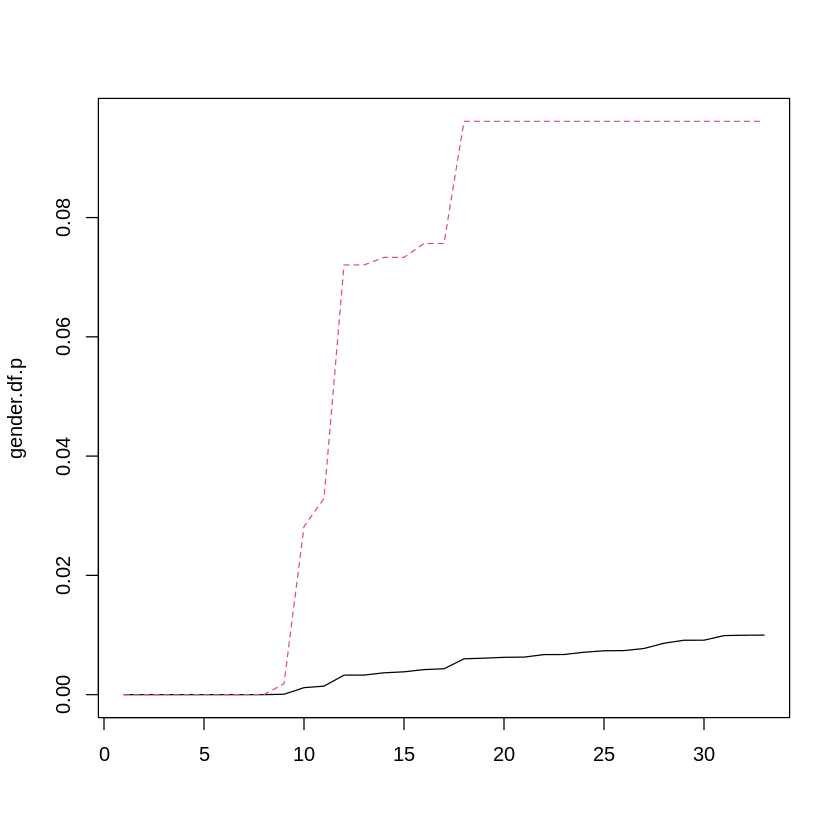

In [ ]:
matplot(gender.df.p, type= "l")

In [ ]:
age.sorted.raw.p = sort(age$pval)
age.sorted.raw.p

[1] 0.002877760 0.003023382 0.029627050 0.049448016 0.050560806 0.077978747
 [7] 0.094841616 0.167267647 0.178457643 0.211333777 0.254530328 0.268551529
[13] 0.278212096 0.292460063 0.328961854 0.441894339 0.476953925 0.487120248
[19] 0.494322188 0.540812954 0.545650048 0.592852386 0.617110864 0.674785464
[25] 0.735384293 0.755243803 0.757447188 0.769138367 0.779115662 0.779419876
[31] 0.784942741 0.882941082 0.956086102

In [ ]:
age.sorted.adj.p = sort(age$pval_adj)
age.sorted.adj.p

[1] 0.09496607 0.09674823 0.91843856 1.00000000 1.00000000 1.00000000
 [7] 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000
[13] 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000
[19] 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000
[25] 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000
[31] 1.00000000 1.00000000 1.00000000

In [ ]:
age.df.p = data.frame(age.sorted.raw.p, age.sorted.adj.p)
head(age.df.p) 

,age.sorted.raw.p,age.sorted.adj.p
,<dbl>,<dbl>
1,0.002877760,0.09496607
2,0.003023382,0.09674823
3,0.029627050,0.91843856
4,0.049448016,1.00000000
5,0.050560806,1.00000000
6,0.077978747,1.00000000


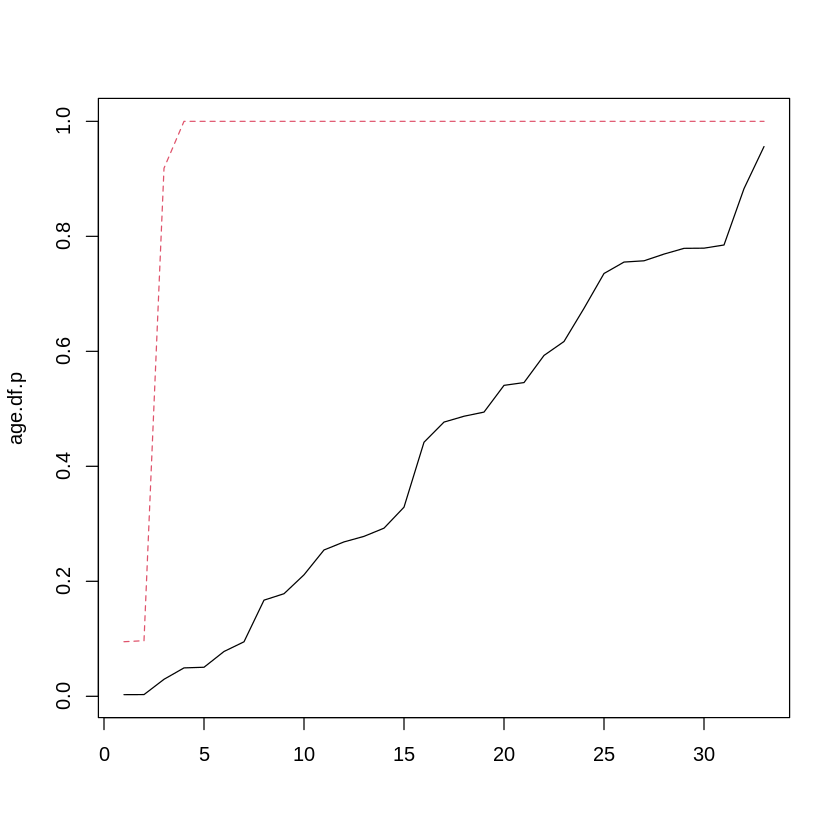

In [ ]:
matplot(age.df.p, type= "l")

6) Repeat #4 and #5 with the Bonferroni method.

In [ ]:
gender.bonf = p.adjust(gender$pval, "bonferroni")
age.bonf = p.adjust(age$pval, "bonferroni")

In [ ]:
gender.bonf.df = data.frame(gender$pval, gender.bonf)
head(gender.bonf.df)

,gender.pval,gender.bonf
,<dbl>,<dbl>
1,9.133044e-03,3.013905e-01
2,7.329210e-05,2.418639e-03
3,7.742819e-03,2.555130e-01
4,1.172742e-10,3.870049e-09
5,1.429817e-03,4.718396e-02
6,4.842837e-09,1.598136e-07


In [ ]:
gender.bonf.sorted = data.frame(sort(gender.bonf.df$gender.pval), sort(gender.bonf.df$gender.bonf))
head(gender.bonf.sorted)

,sort.gender.bonf.df.gender.pval.,sort.gender.bonf.df.gender.bonf.
,<dbl>,<dbl>
1,3.497619e-17,1.154214e-15
2,1.172742e-10,3.870049e-09
3,1.466001e-09,4.837803e-08
4,4.842837e-09,1.598136e-07
5,8.557945e-09,2.824122e-07
6,1.092557e-08,3.605438e-07


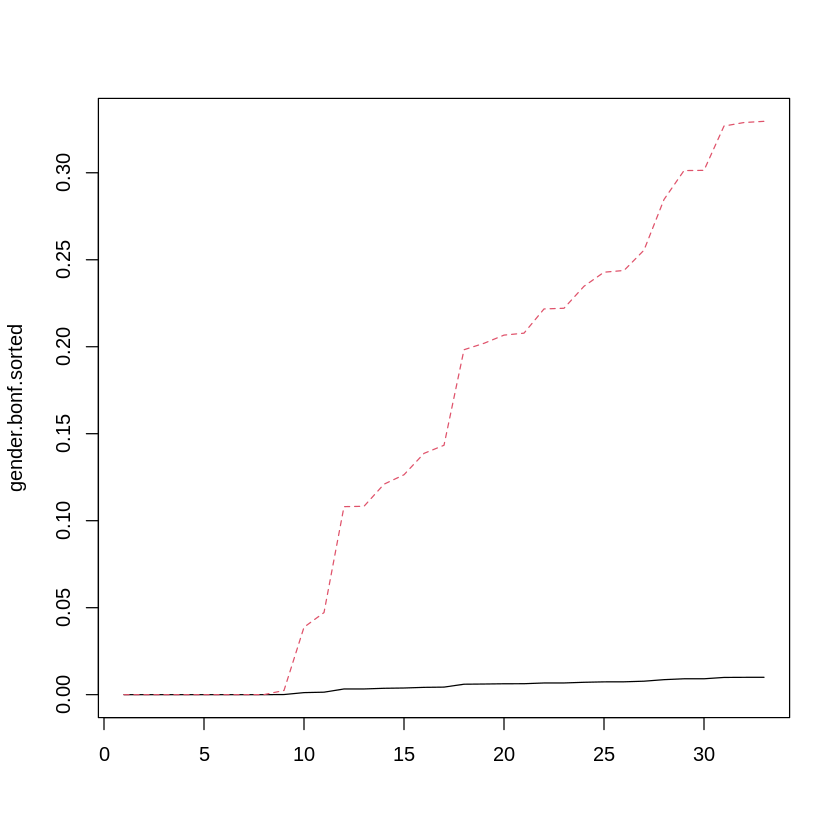

In [ ]:
matplot(gender.bonf.sorted, type= "l")

In [ ]:
age.bonf.df = data.frame(age$pval, age.bonf)
head(age.bonf.df)

,age.pval,age.bonf
,<dbl>,<dbl>
1,0.3289619,1
2,0.7794199,1
3,0.2782121,1
4,0.5456500,1
5,0.5408130,1
6,0.2113338,1


In [ ]:
age.bonf.sorted = data.frame(sort(age.bonf.df$age.pval), sort(age.bonf.df$age.bonf))
head(age.bonf.sorted)

,sort.age.bonf.df.age.pval.,sort.age.bonf.df.age.bonf.
,<dbl>,<dbl>
1,0.002877760,0.09496607
2,0.003023382,0.09977161
3,0.029627050,0.97769266
4,0.049448016,1.00000000
5,0.050560806,1.00000000
6,0.077978747,1.00000000


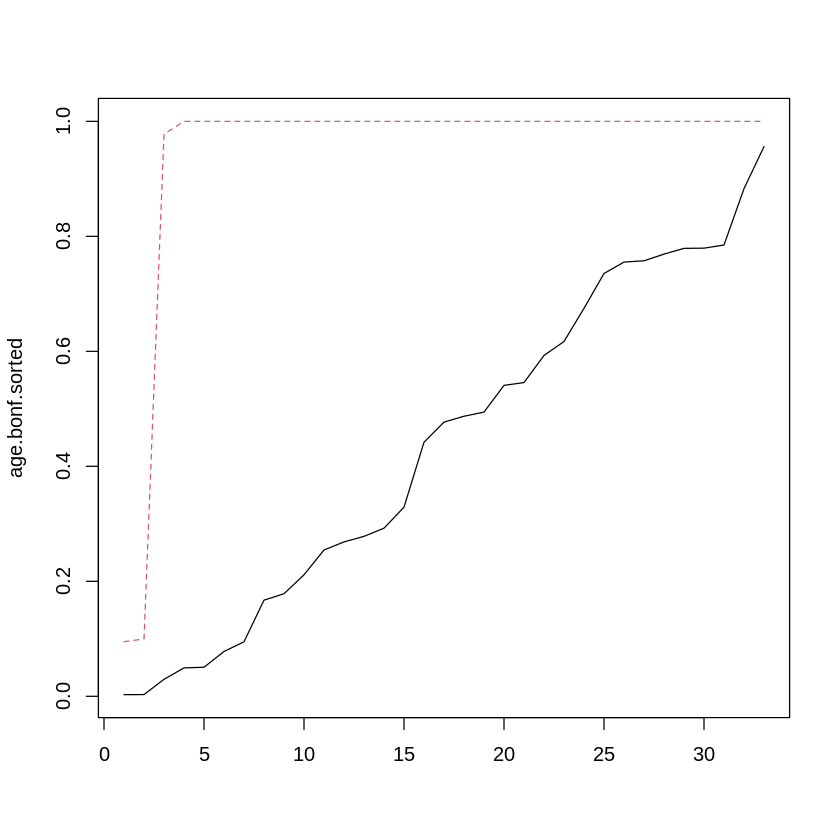

In [ ]:
matplot(age.bonf.sorted, type= "l")

7) Read in the log2 normalized fragments per kb per million mapped reads (FPKM) data matrix and annotation files. This is RNA-sequencing data that has normalized read counts on a similar scale to microarray intensities.

In [ ]:
fpkm= read.table(file = "tcga_brca_fpkm.txt", row.names = 1, header = TRUE)
sam = read.table(file= "tcga_brca_fpkm_sam.txt", row.names = 1, header = TRUE, fill = TRUE)

In [ ]:
head(fpkm)

,TCGA.FD.A3NA.01A.11R.A21D.07,TCGA.FD.A3N6.01A.11R.A21D.07,TCGA.DK.A2I4.01A.11R.A21D.07,TCGA.DK.A3IK.01A.32R.A21D.07,TCGA.BT.A20V.01A.11R.A14Y.07,TCGA.BT.A20O.01A.21R.A14Y.07,TCGA.BT.A20P.01A.11R.A14Y.07,TCGA.BT.A20U.01A.11R.A14Y.07,TCGA.CF.A1HR.01A.11R.A13Y.07,TCGA.CF.A1HS.01A.11R.A13Y.07,⋯,TCGA.GV.A3QG.01A.11R.A220.07,TCGA.GD.A3OP.01A.21R.A220.07,TCGA.DK.A3IT.01A.31R.A20F.07,TCGA.DK.A3IN.01A.11R.A20F.07,TCGA.CF.A3MH.01A.11R.A20F.07,TCGA.GC.A3I6.01A.11R.A20F.07,TCGA.FD.A3B5.01A.11R.A20F.07,TCGA.GV.A3JW.01A.11R.A20F.07,TCGA.CF.A3MF.01A.12R.A21D.07,TCGA.GV.A3JZ.01A.11R.A21D.07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
?|100133144,2.201163,3.437361,3.803940,4.817547,3.953358,2.72323089,2.8985180,4.182303,3.800869,1.835277,⋯,0.2228046,4.373606,2.248413,2.356566,2.245161,5.033797,3.761881,4.695471,3.184502,4.873680
?|100134869,3.001676,4.647775,3.932940,4.428156,2.615228,2.32938197,0.7020369,4.300768,2.768587,2.432291,⋯,2.0226874,4.289650,3.742782,1.448372,3.600912,3.536040,3.216564,4.107646,1.857503,4.416786
?|10357,6.292612,7.029236,7.132629,6.859798,6.909635,7.60241679,7.1914067,7.341755,6.517339,7.723006,⋯,7.7830310,7.128497,7.171212,6.380326,6.726804,6.325714,6.426870,7.853202,4.783965,7.660169
?|10431,10.222903,10.038829,9.574448,10.218837,9.916844,9.87489807,10.3031171,9.497209,10.264383,10.508453,⋯,9.7592609,9.103228,9.651091,9.603522,10.321058,9.955307,9.547907,9.429141,10.723768,10.556414
?|155060,5.817713,6.496261,7.129075,8.908539,7.247411,7.24495839,8.7294257,6.992100,6.199117,5.632603,⋯,7.3869402,8.544053,6.910110,6.959840,8.653101,6.727772,7.160555,8.673178,9.542955,8.096533
?|340602,-3.321928,-3.321928,-1.684550,-1.221960,2.304891,0.01621103,1.7238206,-3.321928,-3.321928,-3.321928,⋯,-1.6130787,-3.321928,-3.321928,5.998313,-3.321928,-3.321928,7.312187,-3.321928,-3.321928,-1.676688


8) Use grep to subset the data matrix only by gene ‘GATA3’ and make sure to cast this vector to numeric.

In [ ]:
gata3 = as.numeric(fpkm[grep('GATA3',rownames(fpkm)),])

In [ ]:
gata3

[1] 14.021765  4.386342 11.230613 13.588289 10.269960  8.095625 14.122478
  [8] 10.448839 12.274544  9.092033 14.351386 11.578297 13.641114  9.798921
 [15] 11.101961 12.514616 12.643971  1.097206  5.839798 11.160448 13.055884
 [22] 12.746981  9.201686 13.793270 14.148787 12.146921 14.073000 12.439508
 [29]  6.937570 11.502573 12.504879 11.969711  9.732262 12.774264  8.010772
 [36] 11.138686  7.990089 12.995225  8.678745 11.182532  9.369592  9.744119
 [43]  8.126189 12.520407 10.840565 12.102176  8.014982 11.780354  5.821590
 [50] 12.429957 13.414759 11.465493 11.585221  6.115818 12.805356 13.191098
 [57] 12.083122 13.202336 13.786522 14.548467 12.526396 14.044123  3.654584
 [64] 13.344271  6.854807  8.316257 13.648748 11.437728  7.592924 12.630158
 [71] 13.212073 11.931943  6.514499  6.721136  6.616321 11.053725 13.231579
 [78]  8.038067 12.761688 11.874562 12.800144 13.940442 13.921707 12.987008
 [85] 13.163389  4.604475  6.629801 12.991973  7.699859 13.533580 13.350130
 [92] 12.882540  6.158430 12.891803 12.535943 12.200913 13.360768 11.295557
 [99]  4.315320  4.495203 10.897675 12.466295 12.035011  8.819418 12.284175
[106] 12.066188 12.548252 11.472523  7.956335 12.080862 12.903302 11.442693
[113] 12.349266 12.233617 11.134016 10.346912 13.634501 12.700991 14.059585

9) Create a binary (1/0) vector for the patients where the upper 25% expression of GATA3 is coded as 1 and all other patients are coded as 0. Call this new variable ‘group’.

In [ ]:
group = ifelse(gata3 > 12.94155, 1, 0)
length(group)

[1] 119

In [ ]:
length(group)

[1] 119

10) Create a data matrix with the ‘group’ variable you created in #9 and the remaining variables in the annotation file.

In [ ]:
sam$group = group

11) Run a Kaplan-Meier (KM) analysis to determine if a difference in survival experience exists between the two GATA3 expression groups using the survdiff function. Extract the p-value from the chi squared test output.

In [ ]:
head(sam)

,bcr_patient_barcode,age_at_initial_pathologic_diagnosis,gender,vital_status,months_to_event,group
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,TCGA-FD-A3NA,60,MALE,LIVING,32.466667,1
2,TCGA-FD-A3N6,43,FEMALE,LIVING,8.066667,0
3,TCGA-DK-A2I4,79,MALE,LIVING,125.566667,0
4,TCGA-DK-A3IK,87,MALE,LIVING,2.233333,1
5,TCGA-BT-A20V,59,FEMALE,DECEASED,5.133333,0
6,TCGA-BT-A20O,75,MALE,DECEASED,12.333333,0


In [ ]:
class(sam)

[1] "data.frame"

In [ ]:
library(survival)

In [ ]:
# as.numeric(as.factor(sam$vital_status))
sam$vital_status[sam$vital_status=='DECEASED'] <- 1
sam$vital_status[sam$vital_status=='LIVING'] <- 0

In [ ]:
sam$vital_status = as.numeric(sam$vital_status)

In [ ]:
head(sam)

,bcr_patient_barcode,age_at_initial_pathologic_diagnosis,gender,vital_status,months_to_event,group
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,TCGA-FD-A3NA,60,MALE,0,32.466667,1
2,TCGA-FD-A3N6,43,FEMALE,0,8.066667,0
3,TCGA-DK-A2I4,79,MALE,0,125.566667,0
4,TCGA-DK-A3IK,87,MALE,0,2.233333,1
5,TCGA-BT-A20V,59,FEMALE,1,5.133333,0
6,TCGA-BT-A20O,75,MALE,1,12.333333,0


In [ ]:
surv.p = survdiff(Surv(months_to_event, vital_status) ~ group, data = sam)
surv.p$p

[1] 0.07296386

12) Now run a Cox proportion hazard (PH) regression model on just the grouping variable (i.e. no other covariates) and extract both the p-value and hazard ratio from the output.

In [ ]:
fit <- coxph(Surv(months_to_event,vital_status)~group, data=sam)

In [ ]:
fit

Call:
coxph(formula = Surv(months_to_event, vital_status) ~ group, 
    data = sam)

         coef exp(coef) se(coef)      z      p
group -0.8520    0.4266   0.4893 -1.741 0.0816

Likelihood ratio test=3.63  on 1 df, p=0.05669
n= 116, number of events= 32 
   (3 observations deleted due to missingness)

13) Run the survfit() function only on the grouping variable (i.e. no other covariates) and plot the KM curves, being sure to label the two groups with a legend, two different colors for each line, and provide the KM p-value, Cox PH p-value, Cox PH hazard ratio, and sample sizes all in each of the two groups all on the plot.

Call: survfit(formula = Surv(months_to_event, vital_status) ~ group, 
    data = sam, type = "kaplan-meier")

3 observations deleted due to missingness 
                group=0 
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
  2.17     74       1    0.986  0.0134        0.961        1.000
  2.70     70       1    0.972  0.0193        0.935        1.000
  3.27     67       1    0.958  0.0238        0.912        1.000
  4.07     66       1    0.943  0.0275        0.891        0.999
  4.70     62       1    0.928  0.0310        0.869        0.991
  4.97     60       1    0.913  0.0341        0.848        0.982
  5.13     59       1    0.897  0.0369        0.828        0.973
  5.57     57       1    0.881  0.0395        0.807        0.962
  6.67     50       1    0.864  0.0424        0.785        0.951
  6.83     48       1    0.846  0.0452        0.762        0.939
  7.43     41       1    0.825  0.0486        0.735        0.926
  7.87     39       1    0.804  0.0517    

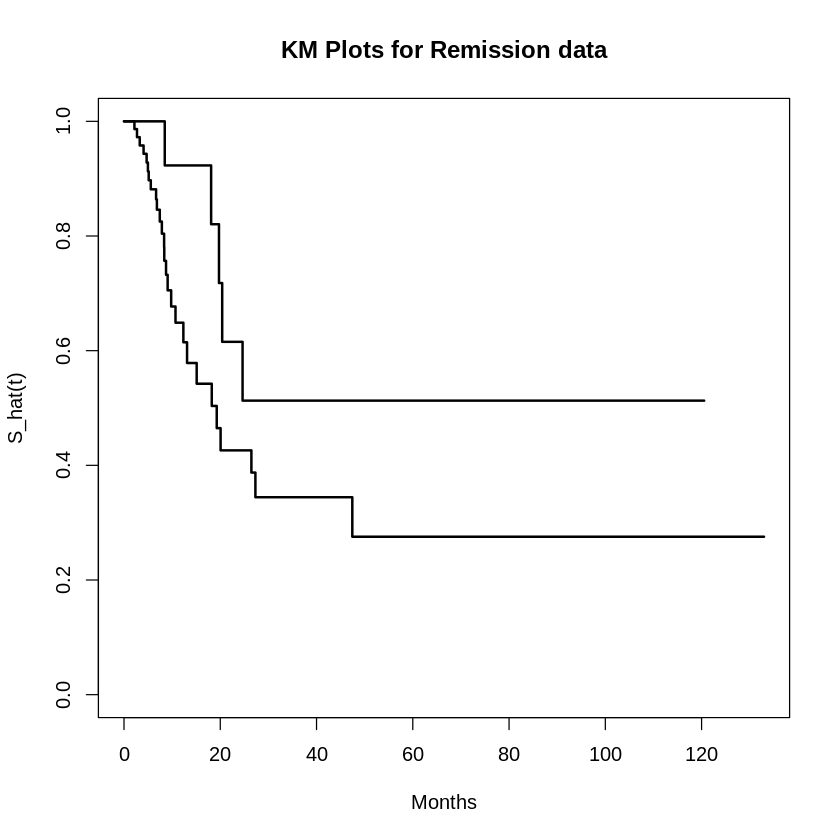

In [ ]:
f <- survfit(Surv(months_to_event, vital_status) ~ group, type="kaplan-meier", data=sam)
summary(f)
plot(f, lwd=2, xlab='Months', ylab='S_hat(t)', main='KM Plots for Remission data')

Call:
coxph(formula = Surv(months_to_event, vital_status) ~ group, 
    data = sam)

  n= 116, number of events= 32 
   (3 observations deleted due to missingness)

         coef exp(coef) se(coef)      z Pr(>|z|)  
group -0.8520    0.4266   0.4893 -1.741   0.0816 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
group    0.4266      2.344    0.1635     1.113

Concordance= 0.596  (se = 0.026 )
Likelihood ratio test= 3.63  on 1 df,   p=0.06
Wald test            = 3.03  on 1 df,   p=0.08
Score (logrank) test = 3.22  on 1 df,   p=0.07


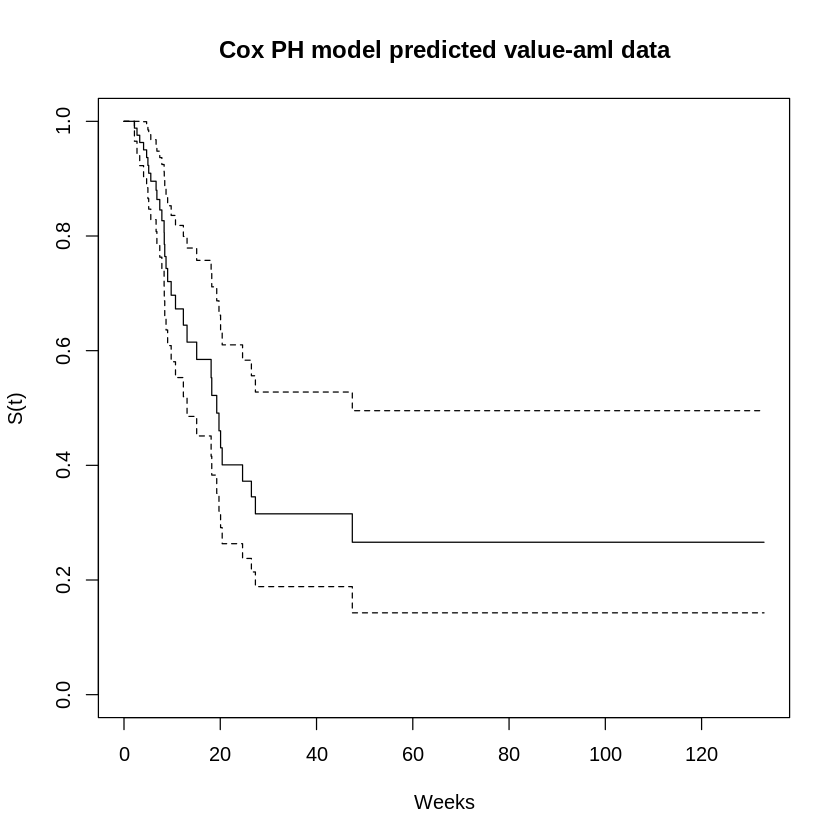

In [ ]:
fit <- coxph(Surv(months_to_event, vital_status) ~ group, data=sam)
summary(fit)
plot(survfit(fit), xlab="Months", ylab="S(t)", main="Cox PH model predicted value-sam data")

14) Does this result agree with the Mehra et al, study result?